# Heart Disease Prediction Project Documentation

This notebook performs an exploratory data analysis and builds a logistic regression model to predict heart disease based on various health indicators.

## Data Loading and initial exploration

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease_dataset.csv to heart_disease_dataset (13).csv


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df = spark.read.csv("heart_disease_dataset.csv", header=True, inferSchema=True)
df.show(10)

+---+------+-----------+--------------+-------------+------------+-------------------------------+---------------+
|Age|   Sex|Cholesterol|Blood Pressure|ChestPainType|MaxHeartRate|Fasting Blood Sugar (FastingBS)|Exercise Angina|
+---+------+-----------+--------------+-------------+------------+-------------------------------+---------------+
| 67|Female|        100|           168|          ATA|         100|                              0|             No|
| 57|Female|        232|            96|          ASY|         116|                              0|            Yes|
| 43|Female|        332|            98|           TA|         124|                              0|            Yes|
| 71|Female|        111|           137|          NAP|         175|                              0|            Yes|
| 36|  Male|        145|           161|          ATA|         190|                              1|            Yes|
| 49|Female|        133|           148|          ASY|         124|              

## Exploratory Data Analysis (EDA)

This section visualizes the distributions of key features within the dataset and explores the relationships between different variables to gain insights into the data and identify potential patterns related to heart disease.

The following visualizations are included:

- **Age Distribution:** A histogram and Kernel Density Estimate (KDE) plot to show the frequency distribution of age in the dataset.
- **Sex Distribution:** A bar chart illustrating the counts of male and female participants.
- **Cholesterol Distribution:** A histogram and boxplot to display the distribution and identify outliers in cholesterol levels.
- **Blood Pressure Distribution:** A histogram and boxplot to show the distribution and identify outliers in blood pressure measurements.
- **Chest Pain Type Distribution:** A bar chart visualizing the frequency of different types of chest pain reported.
- **Max Heart Rate Distribution:** A histogram and KDE plot to show the distribution of the maximum heart rate achieved during exercise.
- **Fasting Blood Sugar (FastingBS):** A bar chart representing the counts of normal (0) and high (1) fasting blood sugar levels.
- **Exercise Angina:** A bar chart showing the distribution of exercise-induced angina (Yes/No).
- **Age vs Cholesterol:** A scatter plot with a regression line to explore the relationship between age and cholesterol levels.
- **Age vs MaxHeartRate:** A scatter plot to visualize the relationship between age and maximum heart rate.
- **ChestPainType vs Cholesterol:** Boxplots to compare cholesterol levels across different chest pain types.
- **Sex vs Cholesterol:** Boxplots to compare cholesterol levels between male and female participants.
- **Exercise Angina vs MaxHeartRate:** Boxplots to compare maximum heart rate between individuals with and without exercise-induced angina.
- **FastingBS vs Cholesterol:** Boxplots to compare cholesterol levels for normal and high fasting blood sugar groups.

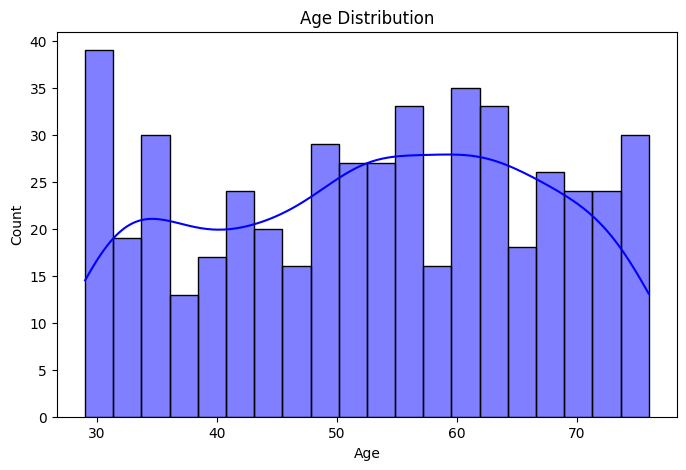

/tmp/ipython-input-333963847.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=to_pandas_series(df, "Sex"), palette="Set2")


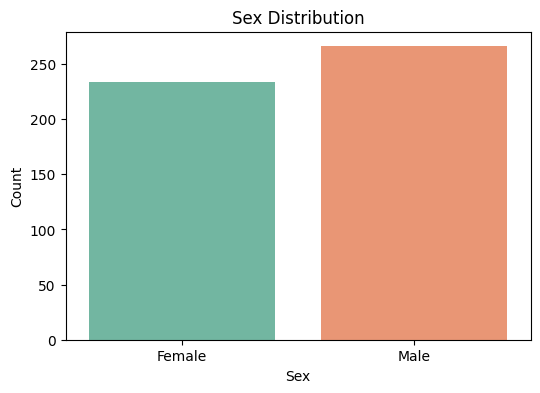

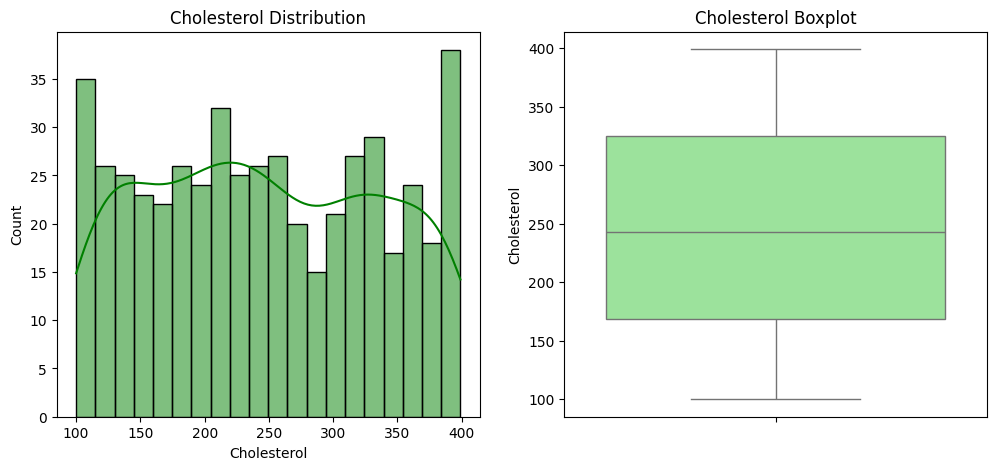

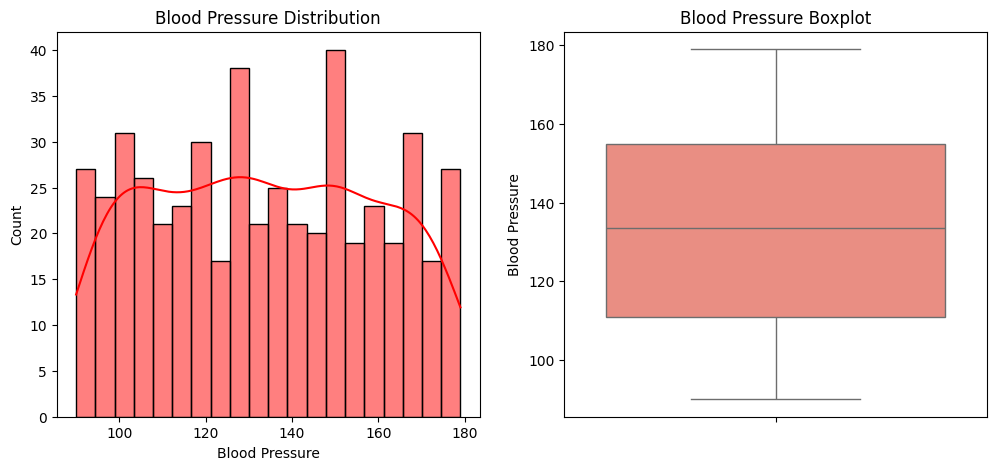

/tmp/ipython-input-333963847.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=to_pandas_series(df, "ChestPainType"), palette="Set1")


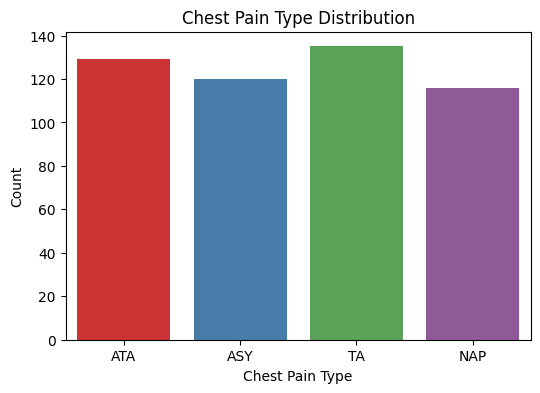

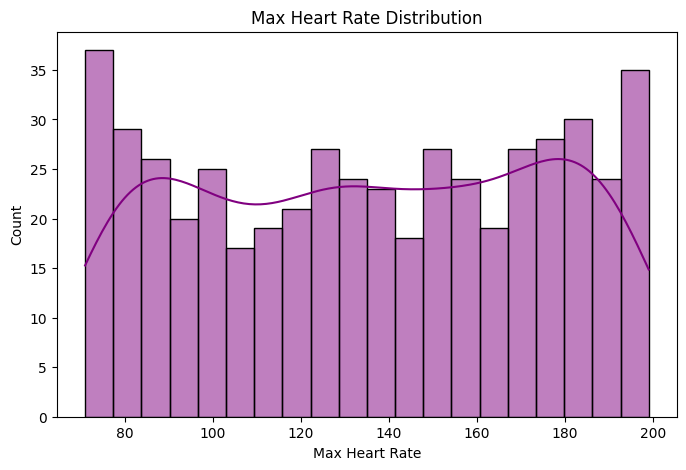

/tmp/ipython-input-333963847.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=to_pandas_series(df, "Fasting Blood Sugar (FastingBS)"), palette="coolwarm")


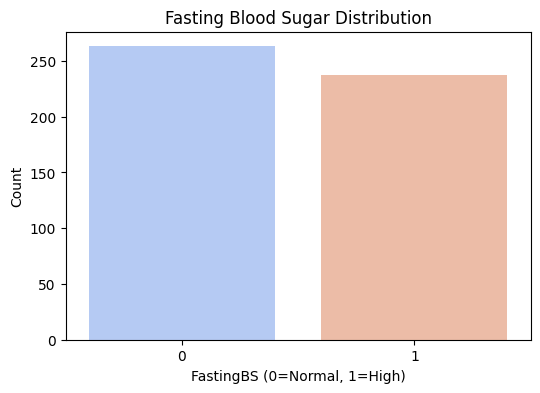

/tmp/ipython-input-333963847.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=to_pandas_series(df, "Exercise Angina"), palette="pastel")


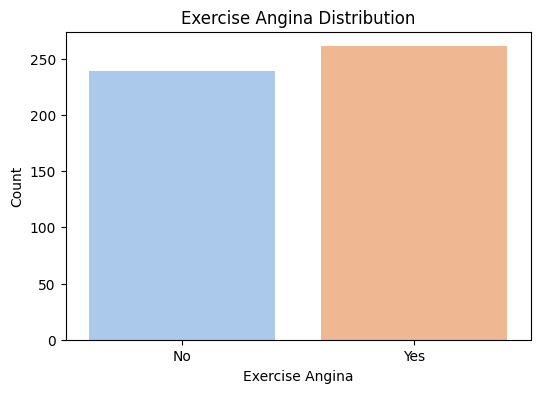

In [ ]:
from pyspark.sql import SparkSession
import seaborn as sns
import matplotlib.pyplot as plt

# Start Spark session
spark = SparkSession.builder.appName("HeartEDA").getOrCreate()

# Load dataset
df = spark.read.csv("heart_disease_dataset.csv", header=True, inferSchema=True)

# Helper: convert a Spark column to Pandas Series for plotting
def to_pandas_series(spark_df, col):
    return spark_df.select(col).dropna().toPandas()[col]

# 1. Age distribution (Histogram + KDE)
plt.figure(figsize=(8,5))
sns.histplot(to_pandas_series(df, "Age"), bins=20, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 2. Sex count (Bar chart)
plt.figure(figsize=(6,4))
sns.countplot(x=to_pandas_series(df, "Sex"), palette="Set2")
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

# 3. Cholesterol distribution (Histogram + Boxplot)
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(to_pandas_series(df, "Cholesterol"), bins=20, kde=True, ax=ax[0], color="green")
ax[0].set_title("Cholesterol Distribution")

sns.boxplot(y=to_pandas_series(df, "Cholesterol"), ax=ax[1], color="lightgreen")
ax[1].set_title("Cholesterol Boxplot")
plt.show()

# 4. Blood Pressure distribution (Histogram + Boxplot)
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(to_pandas_series(df, "Blood Pressure"), bins=20, kde=True, ax=ax[0], color="red")
ax[0].set_title("Blood Pressure Distribution")

sns.boxplot(y=to_pandas_series(df, "Blood Pressure"), ax=ax[1], color="salmon")
ax[1].set_title("Blood Pressure Boxplot")
plt.show()

# 5. ChestPainType count (Bar chart)
plt.figure(figsize=(6,4))
sns.countplot(x=to_pandas_series(df, "ChestPainType"), palette="Set1")
plt.title("Chest Pain Type Distribution")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

# 6. MaxHeartRate distribution
plt.figure(figsize=(8,5))
sns.histplot(to_pandas_series(df, "MaxHeartRate"), bins=20, kde=True, color="purple")
plt.title("Max Heart Rate Distribution")
plt.xlabel("Max Heart Rate")
plt.ylabel("Count")
plt.show()

# 7. Fasting Blood Sugar (0/1)
plt.figure(figsize=(6,4))
sns.countplot(x=to_pandas_series(df, "Fasting Blood Sugar (FastingBS)"), palette="coolwarm")
plt.title("Fasting Blood Sugar Distribution")
plt.xlabel("FastingBS (0=Normal, 1=High)")
plt.ylabel("Count")
plt.show()

# 8. Exercise Angina (Yes/No)
plt.figure(figsize=(6,4))
sns.countplot(x=to_pandas_series(df, "Exercise Angina"), palette="pastel")
plt.title("Exercise Angina Distribution")
plt.xlabel("Exercise Angina")
plt.ylabel("Count")
plt.show()


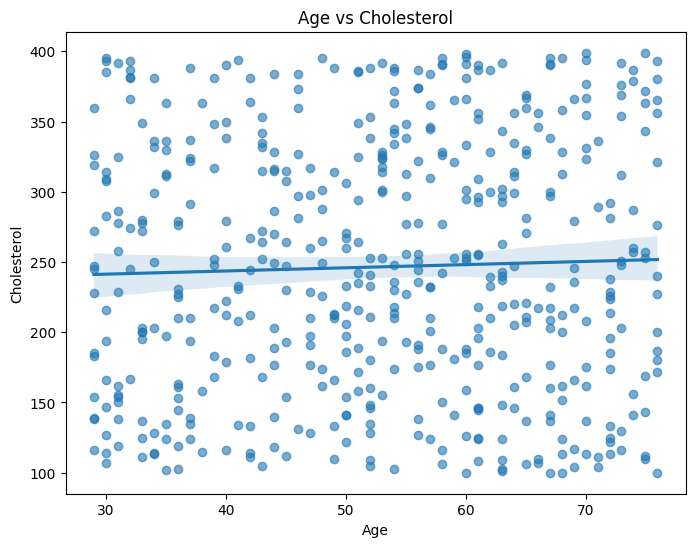

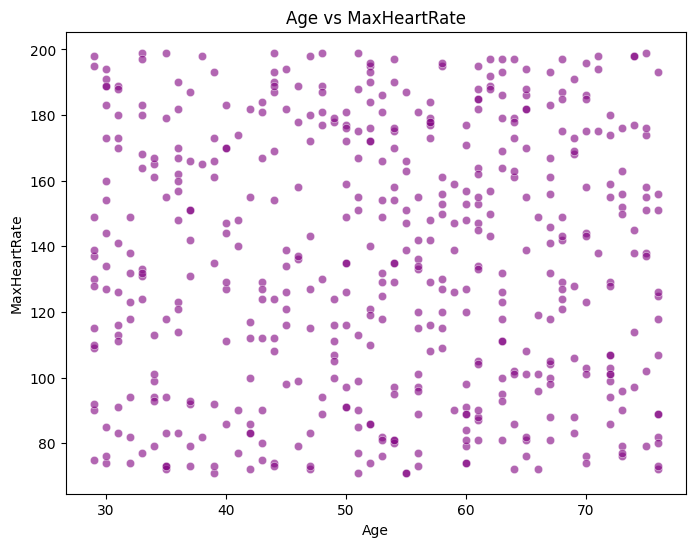

/tmp/ipython-input-4199012857.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=to_pandas(df, ["ChestPainType", "Cholesterol"]), x="ChestPainType", y="Cholesterol", palette="Set2")


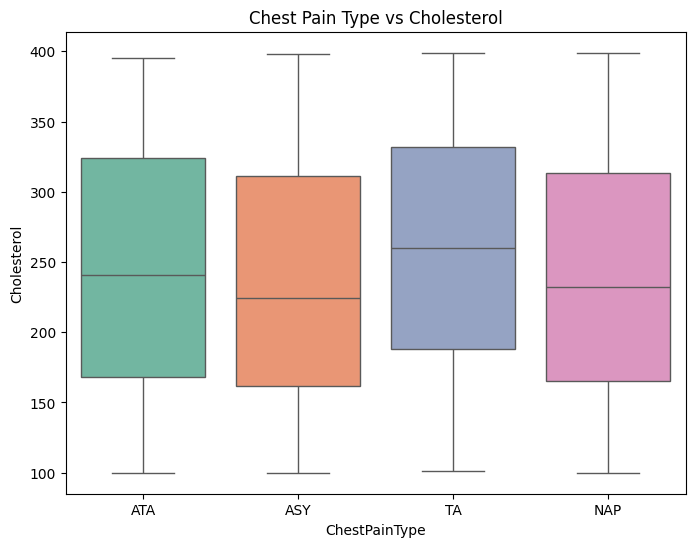

/tmp/ipython-input-4199012857.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=to_pandas(df, ["Sex", "Cholesterol"]), x="Sex", y="Cholesterol", palette="Set1")


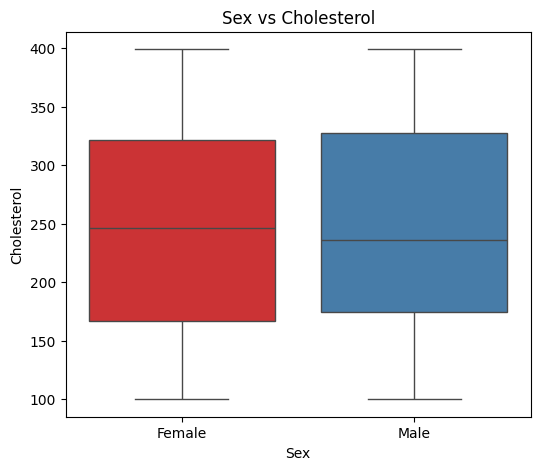

/tmp/ipython-input-4199012857.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=to_pandas(df, ["Exercise Angina", "MaxHeartRate"]), x="Exercise Angina", y="MaxHeartRate", palette="pastel")


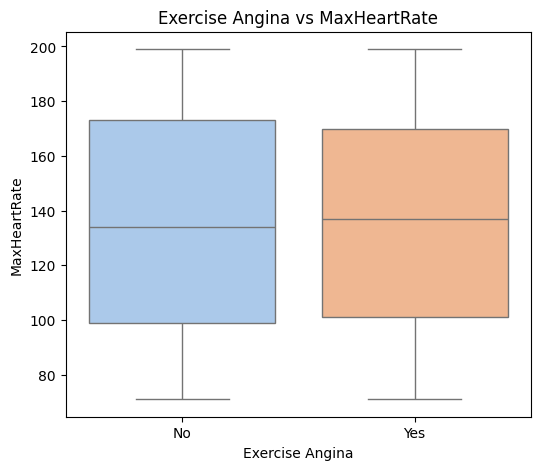

/tmp/ipython-input-4199012857.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=to_pandas(df, ["Fasting Blood Sugar (FastingBS)", "Cholesterol"]),


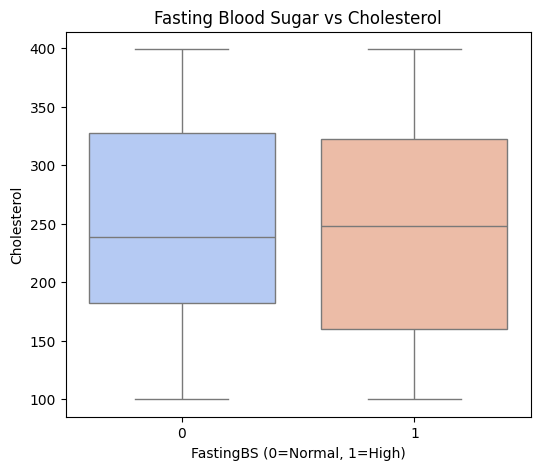

In [ ]:
from pyspark.sql import SparkSession
import seaborn as sns
import matplotlib.pyplot as plt

# Start Spark session
spark = SparkSession.builder.appName("HeartEDA").getOrCreate()

# Load dataset
df = spark.read.csv("heart_disease_dataset.csv", header=True, inferSchema=True)

# Helper: convert Spark DataFrame to Pandas (only needed cols)
def to_pandas(df, cols):
    return df.select(*cols).dropna().toPandas()

# 1. Age vs Cholesterol → Scatter + Regression
plt.figure(figsize=(8,6))
sns.regplot(data=to_pandas(df, ["Age", "Cholesterol"]), x="Age", y="Cholesterol", scatter_kws={"alpha":0.6})
plt.title("Age vs Cholesterol")
plt.show()

# 2. Age vs MaxHeartRate → Scatter
plt.figure(figsize=(8,6))
sns.scatterplot(data=to_pandas(df, ["Age", "MaxHeartRate"]), x="Age", y="MaxHeartRate", alpha=0.6, color="purple")
plt.title("Age vs MaxHeartRate")
plt.show()

# 3. ChestPainType vs Cholesterol → Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=to_pandas(df, ["ChestPainType", "Cholesterol"]), x="ChestPainType", y="Cholesterol", palette="Set2")
plt.title("Chest Pain Type vs Cholesterol")
plt.show()

# 4. Sex vs Cholesterol → Boxplot
plt.figure(figsize=(6,5))
sns.boxplot(data=to_pandas(df, ["Sex", "Cholesterol"]), x="Sex", y="Cholesterol", palette="Set1")
plt.title("Sex vs Cholesterol")
plt.show()

# 5. Exercise Angina vs MaxHeartRate → Boxplot
plt.figure(figsize=(6,5))
sns.boxplot(data=to_pandas(df, ["Exercise Angina", "MaxHeartRate"]), x="Exercise Angina", y="MaxHeartRate", palette="pastel")
plt.title("Exercise Angina vs MaxHeartRate")
plt.show()

# 6. FastingBS vs Cholesterol → Boxplot
plt.figure(figsize=(6,5))
sns.boxplot(data=to_pandas(df, ["Fasting Blood Sugar (FastingBS)", "Cholesterol"]),
            x="Fasting Blood Sugar (FastingBS)", y="Cholesterol", palette="coolwarm")
plt.title("Fasting Blood Sugar vs Cholesterol")
plt.xlabel("FastingBS (0=Normal, 1=High)")
plt.show()


## Data Preprocessing

Categorical variables are encoded, and features are assembled into a vector for model training.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer

# Start Spark session
spark = SparkSession.builder.appName("HeartDiseasePrediction").getOrCreate()

# Load CSV into Spark DataFrame
df = spark.read.csv("heart_disease_dataset.csv", header=True, inferSchema=True)

# Encode categorical variables
indexers = [
    StringIndexer(inputCol="Sex", outputCol="SexIndex"),
    StringIndexer(inputCol="ChestPainType", outputCol="ChestPainIndex"),
    StringIndexer(inputCol="Exercise Angina", outputCol="AnginaIndex")
]

for indexer in indexers:
    df = indexer.fit(df).transform(df)

df.show(10)


+---+------+-----------+--------------+-------------+------------+-------------------------------+---------------+--------+--------------+-----------+
|Age|   Sex|Cholesterol|Blood Pressure|ChestPainType|MaxHeartRate|Fasting Blood Sugar (FastingBS)|Exercise Angina|SexIndex|ChestPainIndex|AnginaIndex|
+---+------+-----------+--------------+-------------+------------+-------------------------------+---------------+--------+--------------+-----------+
| 67|Female|        100|           168|          ATA|         100|                              0|             No|     1.0|           1.0|        1.0|
| 57|Female|        232|            96|          ASY|         116|                              0|            Yes|     1.0|           2.0|        0.0|
| 43|Female|        332|            98|           TA|         124|                              0|            Yes|     1.0|           0.0|        0.0|
| 71|Female|        111|           137|          NAP|         175|                            

## Model Training and Prediction

A logistic regression model is trained on the processed data, and predictions are made on a test set.

In [ ]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

# Assemble features
feature_cols = ["Age", "SexIndex", "Cholesterol", "Blood Pressure", "ChestPainIndex",
                "MaxHeartRate", "Fasting Blood Sugar (FastingBS)", "AnginaIndex"]

assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df = assembler.transform(df)

df.select("Age", "SexIndex", "Cholesterol", "Blood Pressure", "ChestPainIndex",
                "MaxHeartRate", "Fasting Blood Sugar (FastingBS)", "AnginaIndex","features").show(10,truncate=False)

+---+--------+-----------+--------------+--------------+------------+-------------------------------+-----------+----------------------------------------+
|Age|SexIndex|Cholesterol|Blood Pressure|ChestPainIndex|MaxHeartRate|Fasting Blood Sugar (FastingBS)|AnginaIndex|features                                |
+---+--------+-----------+--------------+--------------+------------+-------------------------------+-----------+----------------------------------------+
|67 |1.0     |100        |168           |1.0           |100         |0                              |1.0        |[67.0,1.0,100.0,168.0,1.0,100.0,0.0,1.0]|
|57 |1.0     |232        |96            |2.0           |116         |0                              |0.0        |[57.0,1.0,232.0,96.0,2.0,116.0,0.0,0.0] |
|43 |1.0     |332        |98            |0.0           |124         |0                              |0.0        |[43.0,1.0,332.0,98.0,0.0,124.0,0.0,0.0] |
|71 |1.0     |111        |137           |3.0           |175         |0

## Model Evaluation

The performance of the logistic regression model is evaluated using various metrics.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression

# Create synthetic target column
df = df.withColumn(
    "HeartDisease",
    when((df["Cholesterol"] > 240) |
         (df["Blood Pressure"] > 140) |
         (df["ChestPainType"] == "ASY") |
         ((df["Fasting Blood Sugar (FastingBS)"] == 1) & (df["Exercise Angina"] == "Yes")),
         1).otherwise(0)
)


# Train-test split (80% train, 20% test)
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)

# Logistic Regression Model
lr = LogisticRegression(featuresCol="features", labelCol="HeartDisease", predictionCol="Predicted_HeartDisease")
model = lr.fit(train_df)

# Predictions on test set
predictions = model.transform(test_df)

# Show prediction results
predictions.select("Age", "Sex", "Cholesterol", "Blood Pressure", "ChestPainType",
                   "MaxHeartRate","Fasting Blood Sugar (FastingBS)", "AnginaIndex", "HeartDisease", "Predicted_HeartDisease").show(10, truncate=False)


+---+------+-----------+--------------+-------------+------------+-------------------------------+-----------+------------+----------------------+
|Age|Sex   |Cholesterol|Blood Pressure|ChestPainType|MaxHeartRate|Fasting Blood Sugar (FastingBS)|AnginaIndex|HeartDisease|Predicted_HeartDisease|
+---+------+-----------+--------------+-------------+------------+-------------------------------+-----------+------------+----------------------+
|29 |Female|185        |127           |ASY          |128         |0                              |0.0        |1           |1.0                   |
|29 |Female|319        |163           |TA           |109         |0                              |1.0        |1           |1.0                   |
|29 |Male  |154        |121           |TA           |115         |1                              |1.0        |0           |1.0                   |
|30 |Female|114        |102           |NAP          |191         |1                              |1.0        |0       

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# ---------------- Performance Metrics ----------------
evaluator = MulticlassClassificationEvaluator(
    labelCol="HeartDisease", predictionCol="Predicted_HeartDisease"
)

accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})

print(f"Model Performance on Test Set:")
print(f"Accuracy  = {accuracy:.2f}")
print(f"Precision = {precision:.2f}")
print(f"Recall    = {recall:.2f}")
print(f"F1 Score  = {f1:.2f}")

Model Performance on Test Set:
Accuracy  = 0.89
Precision = 0.87
Recall    = 0.89
F1 Score  = 0.88
